In [52]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import pandas as pd

### Classification Model Evaluation 

The methods used in this section are used to evaluate model performance on train (to see in-sample performance) and on validate (to see out-of-sample performance)

# The Confusion Matrix

A confusion matrix is a cross-tabulation of our model's predictions against the actual values. We will discuss the different evaluation metrics in this lesson.

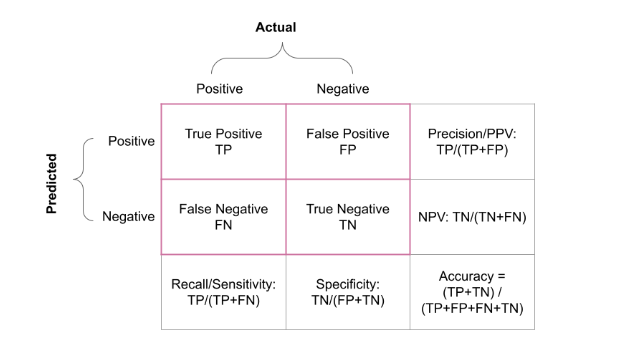

Example: Predicting whether or not someone likes coffee

In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df = pd.DataFrame({
    'actual': ['coffee', 'no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'coffee'],
    'prediction': ['no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'no coffee'],
})
df


,actual,prediction
0,coffee,no coffee
1,no coffee,no coffee
2,no coffee,coffee
3,coffee,coffee
4,coffee,coffee
5,coffee,coffee
6,no coffee,no coffee
7,coffee,no coffee


The confusion matrix would look like this: 

In [5]:
tn, fp, fn, tp = confusion_matrix(df.actual, df.prediction).ravel()
tn, fp, fn, tp

(3, 2, 1, 2)

Analysis of Confusion Matrix: 
- 2 True Positives; two people who were predicted to want coffee, wanted coffee 
- 2 False Positive; two people who was predicted to want coffee, did not want coffee 
- 1 False Negatives; one person who were predicted to not want coffee, actually wanted coffee 
- 3 True Negatives; three people who were predicted to not want coffee, in fact, did not want coffee 

### Baseline

For a classification problem, a common choice for the baseline model is a model that simply predicts the most common 
class every single time. 

In [6]:
df.actual.value_counts()

coffee       5
no coffee    3
Name: actual, dtype: int64

In this model, five people enjoy coffee and 3 people don't enjoy coffee: the baseline model is to predict someone likes coffee every single time. 

In [7]:
df['baseline_prediction'] = 'coffee'

Accuracy: the number of times we predicted correctly divided by the total number of observations. 

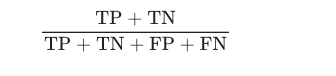

Precision: the percentage of positive predictions that we made that are correct. Precision tells us how good our model's positive predictions are, and does not take into account false negatives or true negatives

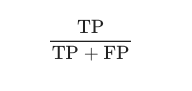

Precision: {hypothetical percent} of the time we predicted someone liked coffee, we were right.

Recall: the percentage of positive cases that we accurately predicted. Recall tells us how well our model does at 'capturing' the actually positive cases.

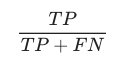

Other Metrics: 
- Misclassification Rate: 1-accuracy; how often does the model get it wrong? 
- Sensitivity: aka True Positive Rate; how good is our model when the actual value is positive? recall for the positive class
- Specificity: how good is our model when the actual value is negative? Recall for the negative class 
- False positive rate: How likely is it we get a false positive when the actual value is negative? 
- F1 Score: the harmonic mean of precision and recall 
- Area under the ROC Curve: A way to measure overall model performance for models that predict not just a class, but a probability as well. 
    

### Exercises

1. Given the following confusion matrix, evaluate (by hand) the model's performance

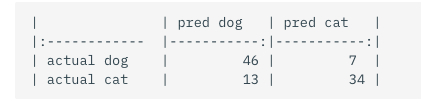

A. In the context of this problem, what is a false positive? 

A false positive would be if the model predicts that the animal is a cat and it is not a cat OR if the model predicts that the animal is a dog and it is not a dog

B. In the context of this problem, what is a false negative? 

A false negative would be if the model predicts that the animal is not a cat but the animal is actually a cat OR if the model predicts the animal is not a dog and the animal is actually a dog

C. How would you describe this model? 

In [9]:
tp = 34
tn = 46
fp = 7
fn = 13


accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

accuracy, recall, precision

(0.8, 0.723404255319149, 0.8292682926829268)

3. You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

Use the predictions dataset and pandas to help answer the following questions:

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?


In [8]:
df = pd.read_csv('https://ds.codeup.com/data/c3.csv')
df.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


In [20]:
df.columns

Index(['actual', 'model1', 'model2', 'model3'], dtype='object')

In [10]:
df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

- Because we are looking for defects, we assign it as the positive class for the classifier
- We need to identify as many defective ducks as possible
- Our best metric in this case is recall

In [11]:
#Model 1 
subset = df[df.actual == 'Defect']
subset

,actual,model1,model2,model3
13,Defect,No Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
74,Defect,No Defect,No Defect,Defect
87,Defect,No Defect,Defect,Defect
118,Defect,No Defect,Defect,No Defect
135,Defect,Defect,No Defect,Defect
140,Defect,No Defect,Defect,Defect
147,Defect,Defect,No Defect,Defect


In [28]:
#Research 
df.model1.value_counts()

No Defect    190
Defect        10
Name: model1, dtype: int64

In [13]:
#Print the mean of model 1 recall 
model_recall = (subset.actual == subset.model1).mean()
print("Model 1")
print(f"Model recall: {model_recall: .2%}")

Model 1
Model recall:  50.00%


In [14]:
#Print the mean of model 2 recall 
model_recall = (subset.actual == subset.model2).mean()
print("Model 2")
print(f"Model recall: {model_recall: .2%}")

Model 2
Model recall:  56.25%


In [15]:
#Print the mean of model 3 recall 
model_recall = (subset.actual == subset.model3).mean()
print("Model 3")
print(f"Model recall: {model_recall: .2%}")

Model 3
Model recall:  81.25%


Takeaways: 
- Quality control should select the model with the highest recall
- Quality Control should use model 3 
- For recall we selected the subset where the  ACTUAL ='defect' (our positive case classifier)

- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?


- Because the company wants to spend as little as possible on these 'free vacations'; we want to minimize False positives. This means we will choose the model with highest precision

In [30]:
subset=df[df.model1 == "Defect"]
subset

,actual,model1,model2,model3
3,No Defect,Defect,Defect,Defect
30,Defect,Defect,No Defect,Defect
62,No Defect,Defect,No Defect,No Defect
65,Defect,Defect,Defect,Defect
70,Defect,Defect,Defect,Defect
135,Defect,Defect,No Defect,Defect
147,Defect,Defect,No Defect,Defect
163,Defect,Defect,Defect,Defect
194,Defect,Defect,No Defect,Defect
196,Defect,Defect,No Defect,No Defect


In [25]:
#calculate precision 
subset=df[df.model1 == "Defect"]
model_precision = (subset.actual == subset.model1).mean()
print("Model 1")
print(f"Model precision: {model_precision: .2%}")

Model 1
Model precision:  80.00%


In [26]:
subset=df[df.model2 == "Defect"]
model_precision = (subset.actual == subset.model2).mean()
print("Model 2")
print(f"Model precision: {model_precision: .2%}")

Model 2
Model precision:  10.00%


In [27]:
subset=df[df.model3 == "Defect"]
model_precision = (subset.actual == subset.model3).mean()
print("Model 3")
print(f"Model precision: {model_precision: .2%}")

Model 3
Model precision:  13.13%


Takeaway: 
- Use model 1 since it will minimize the false positive predictions of defects 
- For precision we selected the subset where the  Model(i) ='defect' (our positive case classifier)

You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recommend for Phase 1? For Phase II?

Because we are looking for dogs, we assign it as the positive class for the classifier

### Dogs

In [31]:
df = pd.read_csv("https://ds.codeup.com/data/gives_you_paws.csv")
df.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


In [32]:
df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [33]:
# Create baseline with most frequent label ('dog')
df["baseline"] = df.actual.value_counts().idxmax()
df.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


Overview: do any of these models perform better than baseline?

In [34]:
(df.baseline == df.actual).mean()

0.6508

65 % is baseline accuracy

In [35]:
(df.model1 == df.actual).mean()

0.8074

In [36]:
(df.model2 == df.actual).mean()

0.6304

In [37]:
(df.model3 == df.actual).mean()

0.5096

In [38]:
(df.model4 == df.actual).mean()

0.7426

First an automated algorithm tags pictures as either a cat or a dog (Phase I). We want to identify as many dogs as possible. For this purpose our best test is recall.

Step 1: Creat a subset dataframe with (only) the rows where the actual is equal to the positive classifier

In [39]:
subset = df[df.actual == 'dog']
subset.head()

,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
8,dog,dog,cat,dog,dog,dog


Step 2: Compare the subset DF actual to the subset DF models and find the mean

In [40]:
# Model 1 Recall
(subset.actual == subset.model1).mean()

0.803318992009834

In [41]:
# Model 2 Recall
(subset.actual == subset.model2).mean()

0.49078057775046097

In [42]:
# Model 3 Recall
(subset.actual == subset.model3).mean()

0.5086047940995697

In [43]:
# Model 4 Recall
(subset.actual == subset.model4).mean()

0.9557467732022127

The winner is Model 4 with a recall of 0.955

In [44]:
# Confusion Matrix for model 4
pd.crosstab(df.model4, df.actual)

actual,cat,dog
model4,,
cat,603,144
dog,1143,3110


Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

For Phase II, precision is appropriate because we are trying to minimize false positives

Step 1: Create subsets where the individual models are set to the positive classifier (dog)

In [45]:
subset1 = df[df.model1 == 'dog']
subset2 = df[df.model2 == 'dog']
subset3 = df[df.model3 == 'dog']
subset4 = df[df.model4 == 'dog']

Step 2: Compare the individual subsets actual to the individual subsets model and find the mean

In [46]:
# Model 1 Precision
(subset1.actual == subset1.model1).mean()

0.8900238338440586

In [48]:
# Model 2 Precision
(subset2.actual == subset2.model2).mean()

0.8931767337807607

In [49]:
# Model 3 Precision
(subset3.actual == subset3.model3).mean()

0.6598883572567783

In [50]:
# Model 4 Precision
(subset4.actual == subset4.model4).mean()

0.7312485304490948

The winner is Model 2 with a precision score of 0.893

### Cats

#Print the classification reports for the four models 

In [53]:
print("Model 1")
pd.DataFrame(classification_report(df.actual, df.model1,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T

,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000


In [54]:
print("Model 2")
pd.DataFrame(classification_report(df.actual, df.model2, output_dict=True)).T


Model 2


,precision,recall,f1-score,support
cat,0.484122,0.890607,0.627269,1746.0000
dog,0.893177,0.490781,0.633479,3254.0000
accuracy,0.630400,0.630400,0.630400,0.6304
macro avg,0.688649,0.690694,0.630374,5000.0000
weighted avg,0.750335,0.630400,0.631310,5000.0000


In [55]:
print("Model 3")
pd.DataFrame(classification_report(df.actual, df.model3,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T


Model 3


,precision,recall,f1-score,support
cat,0.358347,0.511455,0.421425,1746.0000
dog,0.659888,0.508605,0.574453,3254.0000
accuracy,0.509600,0.509600,0.509600,0.5096
macro avg,0.509118,0.510030,0.497939,5000.0000
weighted avg,0.554590,0.509600,0.521016,5000.0000


In [56]:
print("Model 4")
pd.DataFrame(classification_report(df.actual, df.model4,
                                   labels = ['cat', 'dog'],
                                   output_dict=True)).T

Model 4


,precision,recall,f1-score,support
cat,0.807229,0.345361,0.483755,1746.0000
dog,0.731249,0.955747,0.828560,3254.0000
accuracy,0.742600,0.742600,0.742600,0.7426
macro avg,0.769239,0.650554,0.656157,5000.0000
weighted avg,0.757781,0.742600,0.708154,5000.0000


- The Winner for Phase 1 (recall) is model 2 with 0.89
- The winner for Phase II (precision) is model 4 with 0.81

In [57]:
from sklearn.metrics import precision_score, recall_score

In [58]:
def calculate_precision(predictions, positive='dog'):
    return precision_score(df.actual, predictions, pos_label=positive)

def calculate_recall(predictions, positive='dog'):
    return recall_score(df.actual, predictions, pos_label=positive)

pd.concat([
    df.loc[:, 'model1':'baseline'].apply(calculate_recall).rename('recall'),
    df.loc[:, 'model1':'baseline'].apply(calculate_precision).rename('precision'),
], axis=1)

,recall,precision
model1,0.803319,0.890024
model2,0.490781,0.893177
model3,0.508605,0.659888
model4,0.955747,0.731249
baseline,1.000000,0.650800
